In [2]:
pip install textblob


     -------------------------------------- 636.8/636.8 kB 1.0 MB/s eta 0:00:00


In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

import warnings
warnings.filterwarnings('ignore')

In [5]:
tweets = ("C:/Users/manda/OneDrive/Desktop/Data Science/Machine learning assignment/Text Mining/Elon_musk.csv")

In [6]:
import chardet
with open(tweets, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [8]:
tweets = pd.read_csv(tweets,encoding = 'ISO-8859-1')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [9]:
tweets["Tweets"] = tweets["Text"] 

In [10]:
from collections import Counter
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC-1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
### RegEx for stopwords, Replace the symbol, '|' with ' ' ,dropping all the stopwords and generate DF out of Counter
top_N = 100
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['rt']
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (tweets.Tweets
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

words_data = pd.DataFrame(Counter(words).most_common(300),
                    columns=['Word', 'Frequency']).set_index('Word')

In [12]:
words_data

,Frequency
Word,
,243
&amp;,218
@erdayastronaut,140
@spacex,140
@ppathole,123
...,...
watch,7
<u+2192>,7
progress,7


In [13]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC-1\AppData\Roaming\nltk_data...


In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC-1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Text(0, 0.5, 'Count')

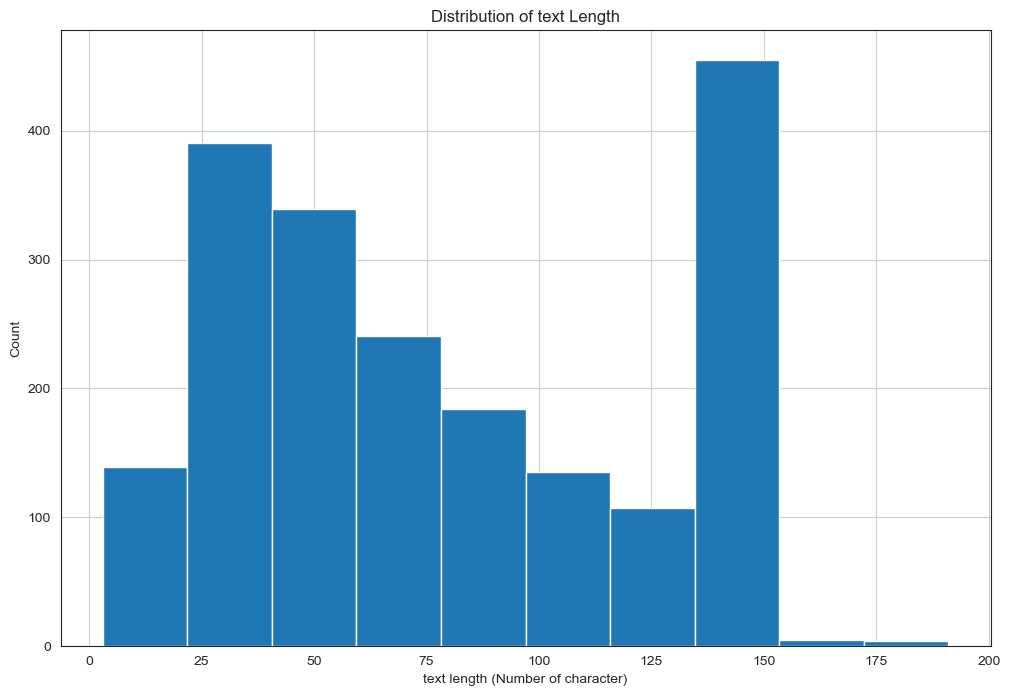

In [15]:
text_length = tweets["Tweets"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
text_length.loc[text_length < 1500].hist()
plt.title("Distribution of text Length")
plt.xlabel('text length (Number of character)')
plt.ylabel('Count')

### 1) converting to lowercase
### 2) Removing ht e punctuations
 ### 3)Removing Numbers from the tweets

In [17]:
tweets["Tweets"]= tweets["Tweets"].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [18]:
import string
tweets["Tweets"]=tweets["Tweets"].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [19]:
tweets["Tweets"]=tweets["Tweets"].str.replace('[0-9]','')

In [20]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC-1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
stop_words=stopwords.words('english')

In [22]:
tweets["Tweets"]=tweets["Tweets"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [23]:
import re
import string
'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
def clean_text(Tweets):
    Tweets = Tweets.lower()
    Tweets = re.sub('\[.*?\]', '', text)
    data = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    Tweets = re.sub('\w*\d\w*', '', text)
    Tweets = re.sub("[0-9" "]+"," ",text)
    Tweets = re.sub('[‘’“”…]', '', text)
    
    return Tweets

clean = lambda x: clean_Tweets(x)

In [24]:
tweets.head(5)

,Unnamed: 0,Text,Tweets
0,1,@kunalb11 Im an alien,kunalb im alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextleve...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,4,@gtera27 Doge is underestimated,gtera doge underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...


In [25]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC-1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
from textblob import Word
tweets["Tweets"]= tweets["Tweets"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/omw-1.4

  Searched in:
    - 'C:\\Users\\PC-1/nltk_data'
    - 'C:\\Users\\PC-1\\anaconda3\\nltk_data'
    - 'C:\\Users\\PC-1\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\PC-1\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\PC-1\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [27]:
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
tweets["Tweets"]= tweets["Tweets"].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [28]:
Tweets_set=tweets["Tweets"]

In [29]:
import re
import sys

def remove_emoji(Tweets_set):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" 
                           u"\U0001F300-\U0001F5FF" 
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [30]:
def remove_emoji(Tweets_set):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" 
                               u"\U0001F300-\U0001F5FF" 
                               u"\U0001F680-\U0001F6FF" 
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002500-\U00002BEF" 
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(tweets["Tweets"])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aber  able  abo  aboard  abort  absence  absolute  absolutely  absorb  \
0        0     0    0       0      0        0         0           0       0   
1        0     0    0       0      0        0         0           0       0   
2        0     0    0       0      0        0         0           0       0   
3        0     0    0       0      0        0         0           0       0   
4        0     0    0       0      0        0         0           0       0   
...    ...   ...  ...     ...    ...      ...       ...         ...     ...   
1994     0     0    0       0      0        0         0           0       0   
1995     0     0    0       0      0        0         0           0       0   
1996     0     0    0       0      0        0         0           0       0   
1997     0     0    0       0      0        0         0           0       0   
1998     0     0    0       0      0        0         0           0       0   

      absorption  ...  zikryzamir  zip  zogfotpik  

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(tweets["Tweets"])
print(TFIDF)

  (0, 115)	0.6882633676812043
  (0, 2781)	0.7254609132876334
  (1, 4764)	0.3503086432516702
  (1, 3283)	0.39490911009737484
  (1, 1728)	0.4162521748644735
  (1, 923)	0.35842289988597426
  (1, 4741)	0.4162521748644735
  (1, 3783)	0.4162521748644735
  (1, 2504)	0.2703073340188711
  (2, 2627)	0.5161856469929814
  (2, 1654)	0.30551902189594055
  (2, 4324)	0.5657784482896928
  (2, 2702)	0.5657784482896928
  (3, 4873)	0.6108339384056402
  (3, 1094)	0.5037497388423235
  (3, 1673)	0.6108339384056402
  (4, 1296)	0.28589571153605836
  (4, 3282)	0.2710934355079962
  (4, 5170)	0.2710934355079962
  (4, 2805)	0.3191670019605536
  (4, 1326)	0.40688241503640693
  (4, 144)	0.324071053081029
  (4, 676)	0.35035486639184493
  (4, 4568)	0.182385317836856
  (4, 806)	0.324071053081029
  :	:
  (1994, 151)	0.14590597884865497
  (1994, 4773)	0.22199987793353756
  (1994, 1456)	0.17061182172730607
  (1995, 21)	0.3907529198938182
  (1995, 713)	0.3907529198938182
  (1995, 795)	0.3907529198938182
  (1995, 4564)	0.39

## Wordcloud

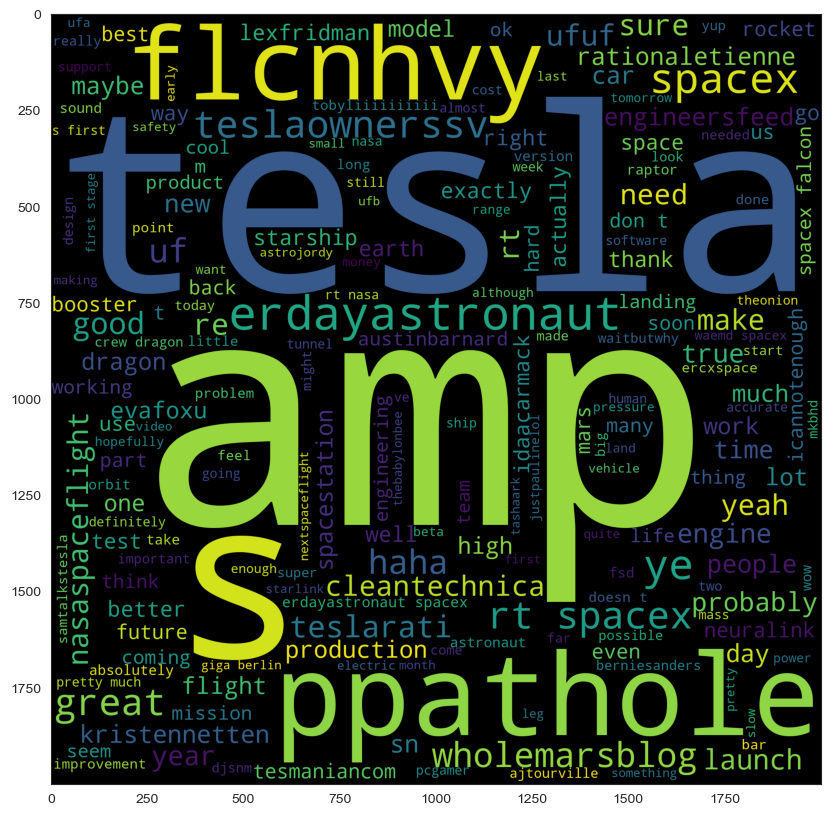

In [33]:
Review_wordcloud = ' '.join(tweets["Tweets"])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

In [34]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC-1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
from textblob import TextBlob
tweets['polarity'] = tweets["Tweets"].apply(lambda x: TextBlob(x).sentiment[0])
tweets[['Tweets','polarity']].head(5)

,Tweets,polarity
0,kunalb im alien,-0.25
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.00
2,joerogan spotify great interview,0.80
3,gtera doge underestimated,0.00
4,teslacn congratulations tesla china amazing ex...,0.20


In [36]:
tweets[tweets.polarity>0].head(5)

,Unnamed: 0,Text,Tweets,polarity
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,0.800000
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,0.200000
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year ox httpstcowfkmyuoj,0.468182
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),owensparks flcnhvy anonyx haha thanks,0.200000
9,10,The most entertaining outcome is the most likely,entertaining outcome likely,0.250000


In [37]:
tweets = tweets.drop(['Text'], axis = 1)
tweets

,Unnamed: 0,Tweets,polarity
0,1,kunalb im alien,-0.250000
1,2,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000
2,3,joerogan spotify great interview,0.800000
3,4,gtera doge underestimated,0.000000
4,5,teslacn congratulations tesla china amazing ex...,0.200000
...,...,...,...
1994,1995,flcnhvy true sounds surreal negative propagand...,0.111111
1995,1996,ppathole make sure read ur terms amp condition...,0.500000
1996,1997,teslagong ppathole samwise gamgee,0.000000
1997,1998,ppathole altho dumb dumber ufuf,-0.375000


In [38]:
def sent_type(Tweets): 
    for i in (Tweets):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [39]:
sent_type(tweets['polarity'])

negative
neutral
positive
neutral
positive
positive
negative
positive
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
positive
neutral
neutral
positive
neutral
negative
positive
neutral
positive
negative
negative
neutral
neutral
neutral
neutral
neutral
negative
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
neutral
neutral
neutral
negative
neutral
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
positive
negative
neutral
neutral
positive
neutral
neutral
positive
negative
positive
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
positive
positive
positive
neutral

In [40]:
tweets["category"]=tweets['polarity']

tweets.loc[tweets.category > 0,'category']="Positive"
tweets.loc[tweets.category !='Positive','category']="Negative"

tweets["category"]=tweets["category"].astype('category')
tweets.dtypes

Unnamed: 0       int64
Tweets          object
polarity       float64
category      category
dtype: object

In [42]:
tweets.category.value_counts(normalize=True).mul(100)

Negative    58.029015
Positive    41.970985
Name: category, dtype: float64